In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc

# a thousand photons in 20 milliseconds...

rc('font',**{'family':'sans-serif','sans-serif':['Ariel']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
plt.rcParams.update({'font.size': 8})

In [2]:
def get_tau_r(N=1,b=1,a=1,eta=1e-3,T=295,p=1):
    '''The Rouse model'''
    k_b = 1.38e-23 #N.B: eta is the dynamic? viscosity 1mPas
    tau_r = (2*N**2*a**2*b*eta)/(np.pi * k_b * T * p**2)
    
    return tau_r

In [3]:
def get_tau_z(N=1,b=1,a=1,eta=1e-3,T=295,p=1):
    '''The Zimm model'''
    k_b = 1.38e-23
    tau_z = (np.sqrt(N)*a)**3/(3*np.pi*p**3)**0.5 * (eta)/(k_b*T)
    
    return tau_z

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


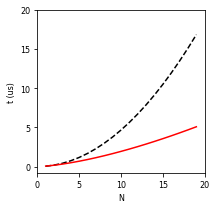

In [4]:
f,ax = plt.subplots(1,1,figsize = (3,3),sharex=True)

N_vals = np.arange(1,20)

ax.plot(
    N_vals,
    [get_tau_r(N=N,b = 3.56e-9,a=9.15e-9) / 1e-6 for N in N_vals], #like 40 nanoseconds?t
    'k--',label = 'Rouse Model'
    )
ax.plot(
    N_vals,
    [get_tau_z(N=N,b = 3.56e-9,a=9.15e-9) / 1e-6 for N in N_vals], #like 40 nanoseconds?t
    'r-',label = 'Zimm Model'
    )

ax.set_xlabel('N')
ax.set_ylabel('t (us)')

ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0,5,10,15,20])

<h1> Now do it for the polymer length </h1>

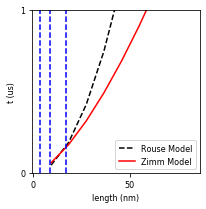

In [5]:
f,ax = plt.subplots(1,1,figsize = (3,3),sharex=True)

N_vals = np.arange(1,10)

ax.plot(
    N_vals*9.15e-9*1e9,
    [get_tau_r(N=N,b = 3.56e-9,a=9.15e-9) / 1e-6 for N in N_vals], #like 40 nanoseconds?t
    'k--',label = 'Rouse Model'
    )
ax.plot(
    N_vals*9.15e-9*1e9,
    [get_tau_z(N=N,b = 3.56e-9,a=9.15e-9) / 1e-6 for N in N_vals], #like 40 nanoseconds?t
    'r-',label = 'Zimm Model'
    )

ax.set_xlabel('length (nm)')
ax.set_ylabel('t (us)')


d1 = 0.3*(1*9+2)
d2 = 0.3*(3*9+2)
d3 = 0.3*(6*9+2)

for d in [d1,d2,d3]:
    plt.plot(d*np.ones(100),
             np.linspace(0,30,100),'b--')
    
ax.set_ylim([0,1])
ax.set_xticks([0,50])
ax.set_yticks([0,1])

plt.legend()

plt.savefig('rouse_zimm_model.pdf')

plt.savefig('rouse_zimm_model.png',dpi = 1000.)

In [6]:
#how long is the 6mer?
sixmer_length = 9*6.*0.3e-9 / 9.15e-9

In [7]:
sixmer_length

1.7704918032786887

In [8]:
#expected time betweeen photons
print (1. / 10000.  / 1e-6)

100.00000000000001


In [21]:
get_tau_z(N=2,b = 3.56e-9,a=9.15e-9) / 1e-9 #like 40 nanoseconds?t

173.36906604529074

In [25]:
get_tau_r(N=4,b = 3.56e-9,a=9.15e-9) / 1e-9 #like 40 nanoseconds?

745.7464408968001

In [26]:
get_tau_z(N=4,b = 3.56e-9,a=9.15e-9) / 1e-9 #like 40 nanoseconds?

490.3617689944139

In [18]:
get_tau_r(N=10,b = 3.56e-9,a=9.15e-9) / 1e-6 #like 40 nanoseconds?

4.660915255605001

In [19]:
#work out the expected number of photons per second.